In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('realest.csv')

In [3]:
df.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [4]:
df.rename(columns={'Space':'Square'},inplace=True)

In [5]:
df.head()

,Price,Bedroom,Square,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [ ]:
df.shape

(157, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Square     146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [7]:
df.describe()

,Price,Bedroom,Square,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [ ]:
df.isnull().sum()

Price         1
Bedroom       1
Square       11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [8]:

df['Price']=df['Price'].fillna(df['Price'].mean())
df['Bedroom']=df['Bedroom'].fillna(df['Bedroom'].mean())
df['Square']=df['Square'].fillna(df['Square'].mean())
df['Room']=df['Room'].fillna(df['Room'].mean())
df['Lot']=df['Lot'].fillna(df['Lot'].mean())
df['Tax']=df['Tax'].fillna(df['Tax'].mean())
df['Bathroom']=df['Bathroom'].fillna(df['Bathroom'].mean())
df['Garage']=df['Garage'].fillna(df['Garage'].mean())
df['Condition']=df['Condition'].fillna(df['Condition'].mean())

In [9]:
df.isnull().sum()

Price        0
Bedroom      0
Square       0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

In [10]:
df.columns

Index(['Price', 'Bedroom', 'Square', 'Room', 'Lot', 'Tax', 'Bathroom',
       'Garage', 'Condition'],
      dtype='object')

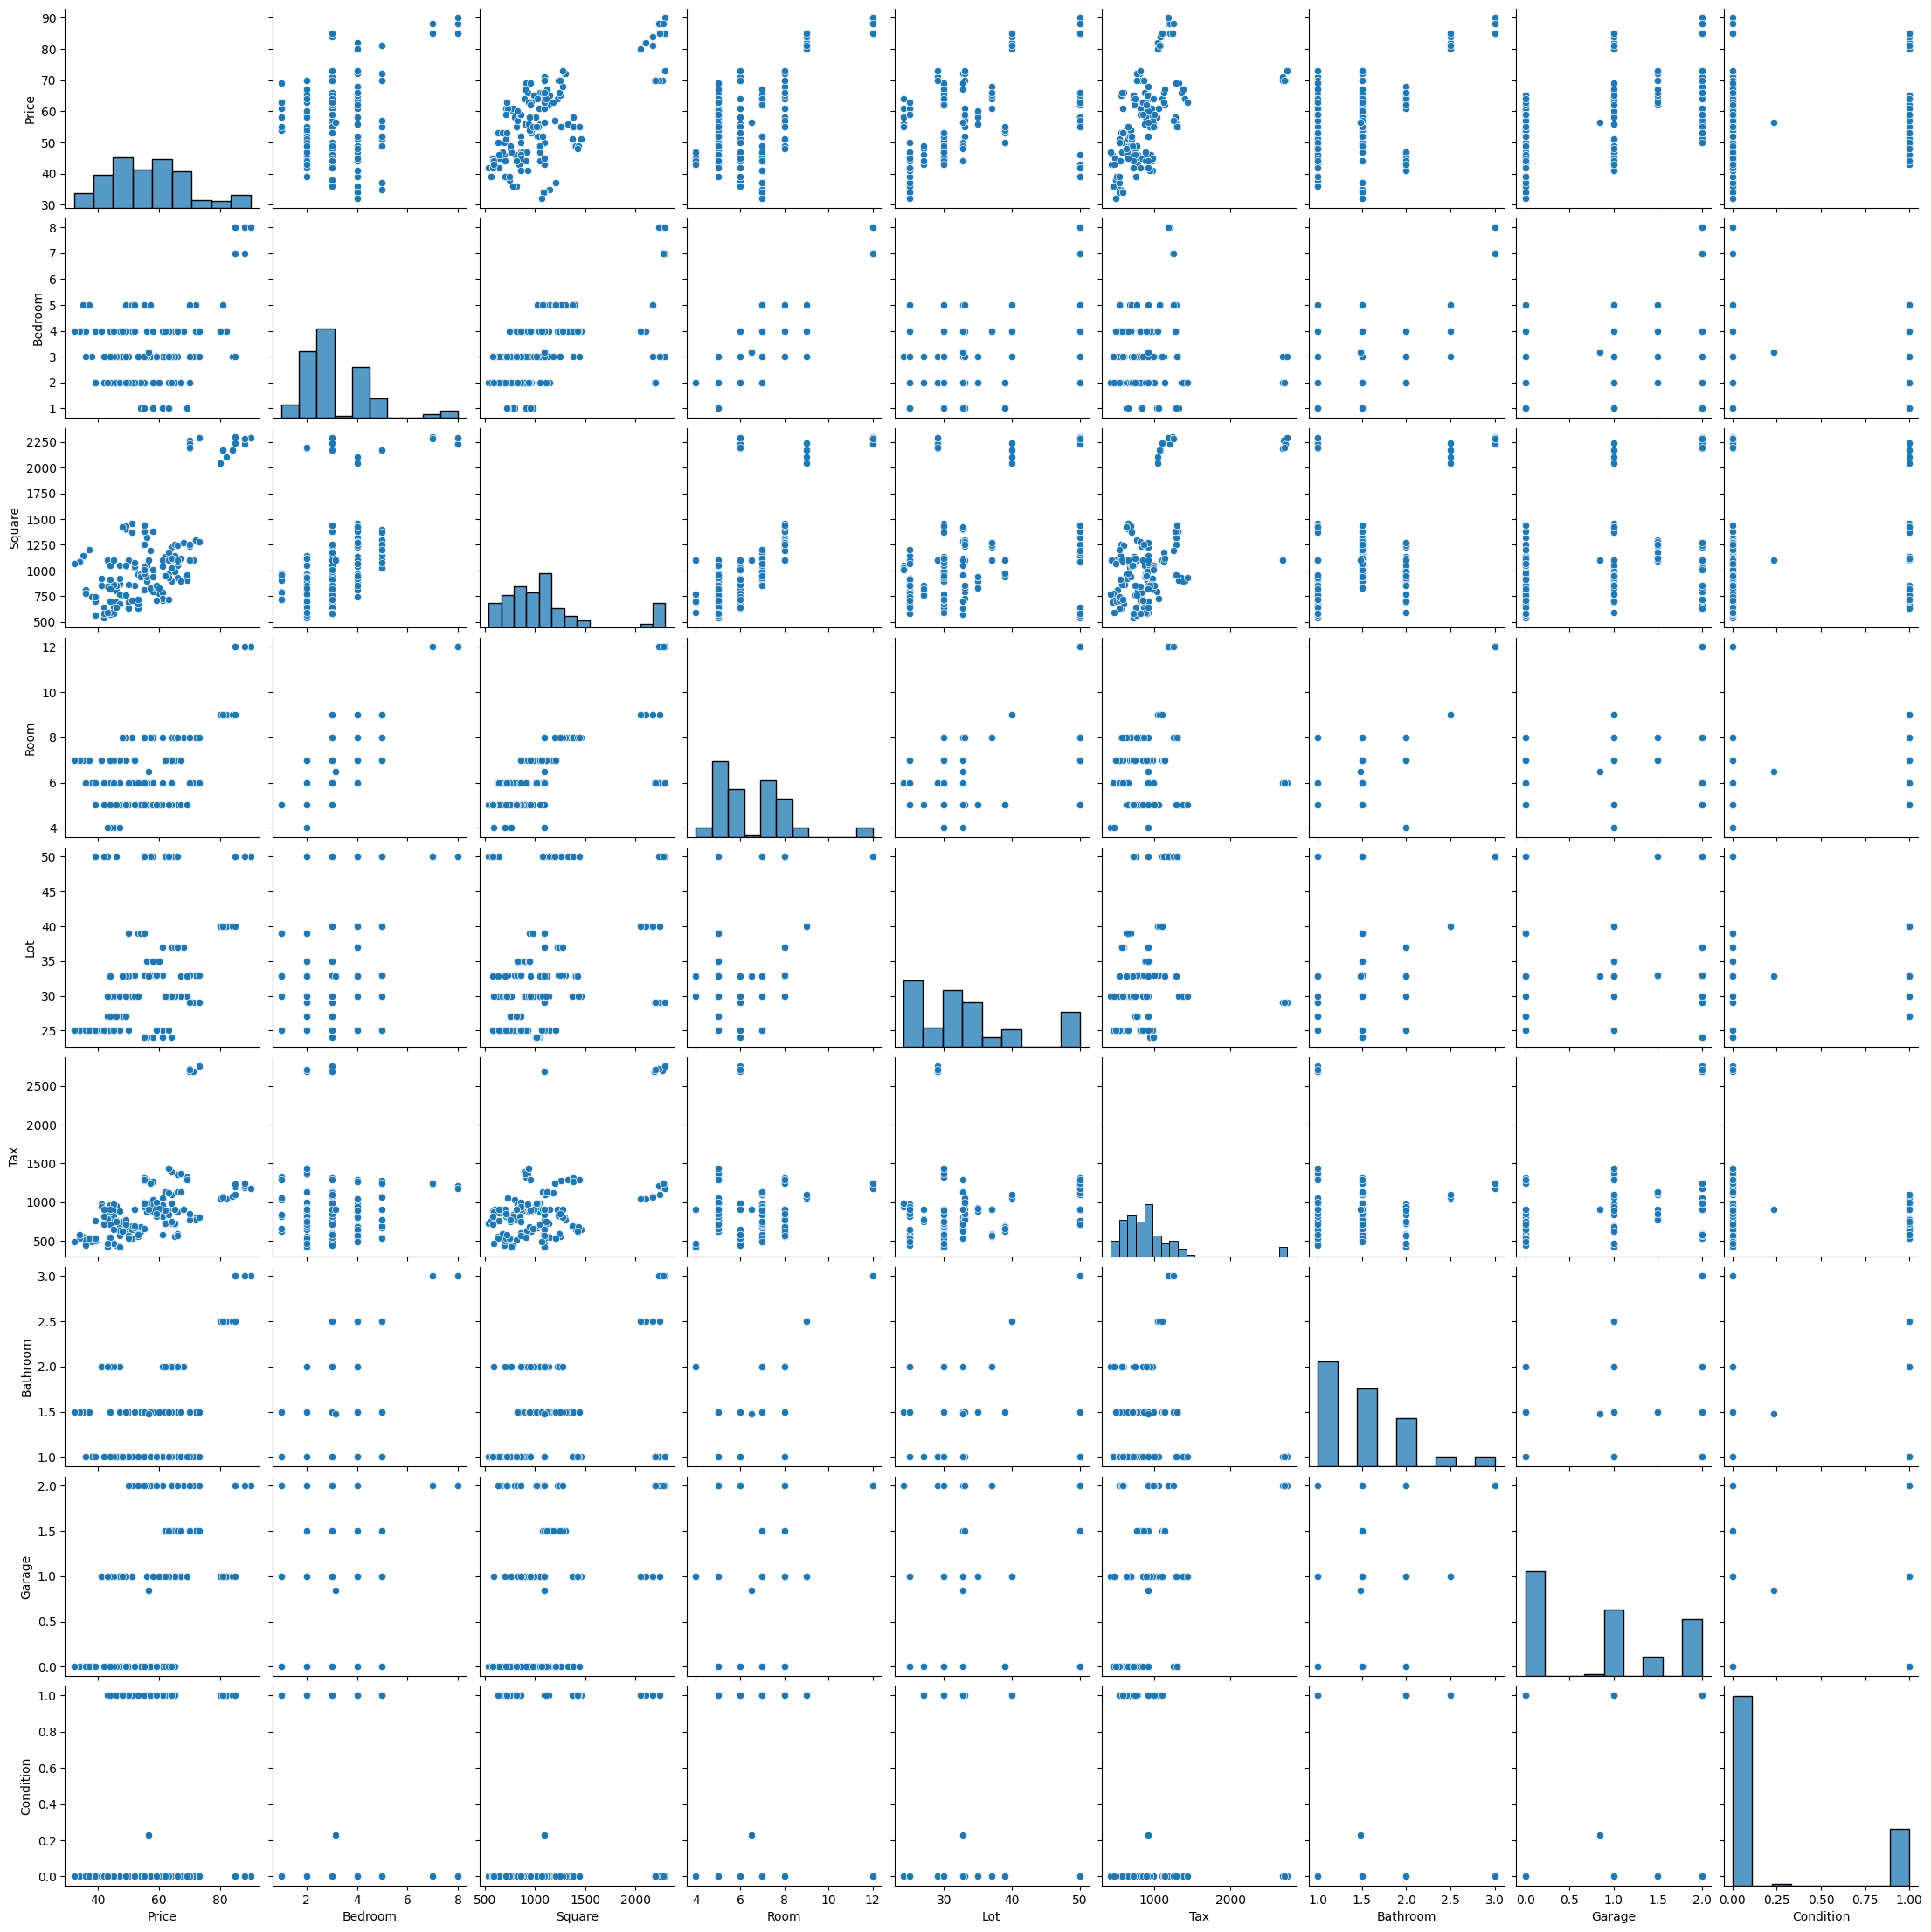

In [11]:
sns.pairplot(df)

<Axes: >

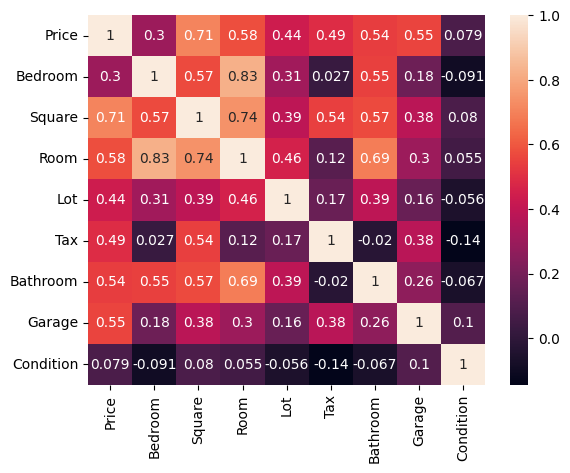

In [12]:
sns.heatmap(df.corr(), annot=True)

In [14]:
x=df[['Bedroom','Bathroom','Square']]
y=df['Price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=101)

In [17]:
x_train

,Bedroom,Bathroom,Square
104,1.0,1.5,978.000000
108,3.0,1.5,1178.000000
23,2.0,2.0,696.000000
6,5.0,1.0,1400.000000
51,3.0,2.0,1053.000000
...,...,...,...
63,3.0,1.0,581.000000
70,1.0,1.0,907.000000
81,3.0,1.5,1035.000000
11,2.0,1.0,641.000000


In [18]:
y_train

104    55.0
108    63.0
23     46.0
6      49.0
51     66.0
       ... 
63     45.0
70     69.0
81     55.0
11     45.0
95     61.0
Name: Price, Length: 94, dtype: float64

In [21]:

from sklearn.preprocessing import MinMaxScaler

In [22]:
from os import sched_getscheduler
ScalerX=MinMaxScaler(feature_range=(0,1))
x_train[x_train.columns] = ScalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = ScalerX.transform(x_test[x_test.columns])
x_train

,Bedroom,Bathroom,Square
104,0.000000,0.25,0.250000
108,0.285714,0.25,0.363895
23,0.142857,0.50,0.089408
6,0.571429,0.00,0.490319
51,0.285714,0.50,0.292711
...,...,...,...
63,0.285714,0.00,0.023918
70,0.000000,0.00,0.209567
81,0.285714,0.25,0.282460
11,0.142857,0.00,0.058087


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm=LinearRegression()

In [25]:
lm.fit(x_train, y_train)

LinearRegression()

In [26]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['coefficient'])

In [27]:
coeff_df

,coefficient
Bedroom,-19.709550
Bathroom,17.385753
Square,33.297261


In [28]:
prediction=lm.predict(x_test)

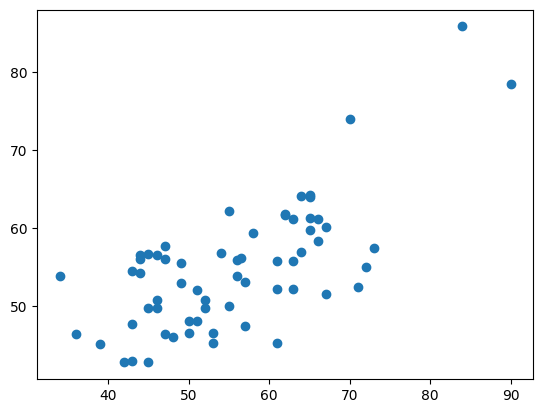

In [29]:
plt.scatter(y_test,prediction)

<ipython-input-30-35d4b53c5f57>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=50)


<Axes: xlabel='Price', ylabel='Density'>

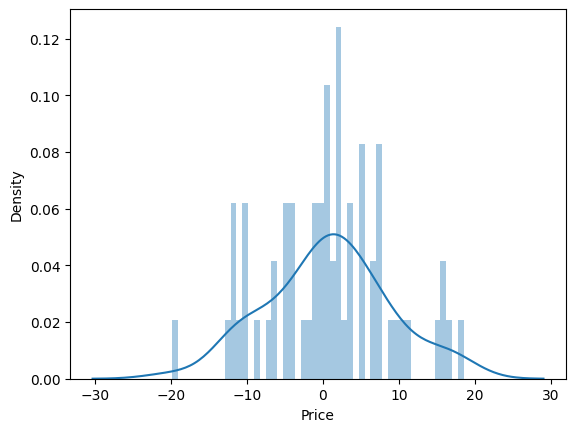

In [30]:
sns.distplot((y_test-prediction),bins=50)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [35]:
mae=mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)
r2 = r2_score(y_test, prediction)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 6.184713299108271
Mean Squared Error: 63.73313158811445
R-squared: 0.47447857984018027
